In [1]:
%pylab inline
import numpy as np
sys.path.append('../../')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import IMPERIAL_LENGTH

from scipy import ndimage

def read_data(filename):

    # read the boundary points and get a mask
    raw_data = np.loadtxt(filename,skiprows=0)
    coords = raw_data[:,:2]
    deflection = raw_data[:,2]
    boundary = raw_data[:,3]
    return  coords, deflection, boundary

coords, deflection, boundary = read_data('../../tractionforce/data/t2.txt')
x_obs_positions = sorted(set(coords[:, 0]))
y_obs_positions = sorted(set(coords[:, 1]))
dx = abs(x_obs_positions[1]-x_obs_positions[0])
dy = abs(y_obs_positions[1]-y_obs_positions[0])

N = len(x_obs_positions)
M = len(y_obs_positions)

boundary2d = boundary.reshape((N, M))
mask = np.zeros(boundary2d.shape)
for r in range(boundary2d.shape[1]):
    pts = np.where(boundary2d[:, r] == 1)
    
    if (len(pts[0]) > 0):
        mini = (min(min(pts)))
        maxi = max(max(pts))
        mask[ mini:maxi, r] = 1

distances2d = -ndimage.distance_transform_edt(mask) + ndimage.distance_transform_edt(1 - mask)
distances2d = distances2d.flatten()




Populating the interactive namespace from numpy and matplotlib


# Inverse problem

We wish to reconstruct surface ($z=0$) stresses $\sigma_{xz}(x,y)$, $\sigma_{yz}(x,y)$, from surface measurements $u_x$(x,y,z=0) where

$$u_x (\mathbf{r},z=0) = \int \left[G_{xy}(\mathbf{r}_\perp-\mathbf{r}_\perp^\prime , 0){\sigma_{yz}(\mathbf{r}_\perp^\prime)} +  G_{xx}(\mathbf{r}_\perp-\mathbf{r}_\perp^\prime , 0){\sigma_{xz}(\mathbf{r}_\perp^\prime)}\right] d\mathbf{r}_\perp. $$

In [2]:
boundary = boundary.reshape((190,190))
mask = np.zeros(boundary.shape)
for r in range(boundary.shape[0]):
    pts = np.where(boundary[r,:]==1)
    if(len(pts[0])>0):
        mini  = (min(min(pts)))
        maxi = max(max(pts))
        mask[r,mini:maxi]=1

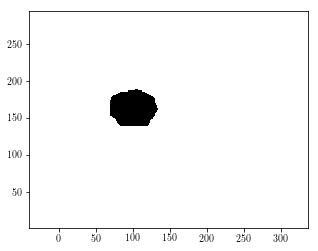

In [3]:
fig = plt.figure(figsize=(5,4))

plt.pcolormesh(x_obs_positions,y_obs_positions,mask.transpose(),
               cmap='Greys')
plt.axes().set_aspect('equal', 'datalim')


#plt.savefig('mask.eps')

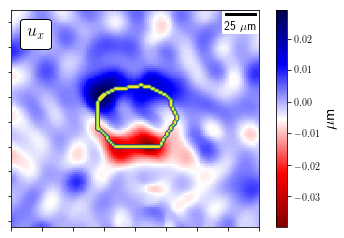

In [7]:


im = plt.pcolormesh(x_obs_positions,y_obs_positions,deflection.reshape((190,190)).transpose(),
               cmap='seismic_r',rasterized=True).axes.set_aspect('equal')

ax=plt.gca()

#cb = ax.colorbar()
#ax.set_label("microns")
#plt.xlabel('microns')
#plt.ylabel('microns')
#plt.title(r'$u_x$')

at = AnchoredText("$u_x$",
                  prop=dict(size=18), frameon=True,
                  loc=2,
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)


ax.set_xlim((0,200))
ax.set_ylim((75,250))
ax.set_yticklabels([])
ax.set_xticklabels([])

cb = plt.colorbar(im, ax=ax)
cb.set_label("$\mu$m",fontsize=16)

plt.contour(x_obs_positions,y_obs_positions,boundary.transpose())


scalebar = ScaleBar(0.000001,font_properties = {'size': 12, 'weight': 'bold'}) # 1 pixel = .001
scalebar.set_frameon(True)
ax.add_artist(scalebar)
    
plt.savefig("../figures/fig8.png",bbox_inches='tight', 
               transparent=True,
               pad_inches=0.15, dpi=400)   
plt.savefig("../figures/fig8.pdf",bbox_inches='tight')   

In [ ]:


im = plt.pcolormesh(x_obs_positions,y_obs_positions,deflection.reshape((190,190)).transpose(),
               cmap='seismic_r').axes.set_aspect('equal')

ax=plt.gca()

#cb = ax.colorbar()
#ax.set_label("microns")
#plt.xlabel('microns')
#plt.ylabel('microns')
#plt.title(r'$u_x$')

at = AnchoredText("$u_x$",
                  prop=dict(size=18), frameon=True,
                  loc=2,
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)


ax.set_xlim((0,200))
ax.set_ylim((75,250))
ax.set_yticklabels([])
ax.set_xticklabels([])

cb = plt.colorbar(im, ax=ax)
cb.set_label("$\mu m$",fontsize=16)

plt.contour(x_obs_positions,y_obs_positions,boundary.transpose())


scalebar = ScaleBar(1,font_properties = {'size': 12, 'weight': 'bold'}) # 1 pixel = .001
scalebar.label_formatter = lambda value, unit: str(value)#+' pixels'
ax.add_artist(scalebar)
    


In [ ]:
?ScaleBar